In [1]:
# Importando las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("2titanic.csv")

In [3]:
# Voy a leer los primeros 5 renglones de mi dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
# La funcion count me permite saber cuantos elementos hay en cada columna
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [6]:
col_names = data.columns.tolist() #Convierte las columnas de mi dataset en una lista y guardalas en la variable col_names
col_names

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [7]:
for column in col_names:
    print("Valores nulos en", column, ": ", data[column].isnull().sum())

Valores nulos en PassengerId :  0
Valores nulos en Survived :  0
Valores nulos en Pclass :  0
Valores nulos en Name :  0
Valores nulos en Sex :  0
Valores nulos en Age :  177
Valores nulos en SibSp :  0
Valores nulos en Parch :  0
Valores nulos en Ticket :  0
Valores nulos en Fare :  0
Valores nulos en Cabin :  687
Valores nulos en Embarked :  2


In [8]:
# Transformar para que la columna sex en lugar de decir male o female diga M o F
d = {'male':'M','female':'F'}
data['Sex'] = data['Sex'].apply(lambda x:d[x])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Copiar la columna sex en una nueva columna que se llame Gender
data['Gender'] = data['Sex']
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,S,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C,F
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,F
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S,F
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,NaN,S,M


In [10]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# Cuantas y cuáles personas se subieron sin pagar?
data[data.Fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
179,180,0,3,"Leonard, Mr. Lionel",M,36.0,0,0,LINE,0.0,NaN,S,M
263,264,0,1,"Harrison, Mr. William",M,40.0,0,0,112059,0.0,B94,S,M
271,272,1,3,"Tornquist, Mr. William Henry",M,25.0,0,0,LINE,0.0,NaN,S,M
277,278,0,2,"Parkes, Mr. Francis ""Frank""",M,NaN,0,0,239853,0.0,NaN,S,M
302,303,0,3,"Johnson, Mr. William Cahoone Jr",M,19.0,0,0,LINE,0.0,NaN,S,M
413,414,0,2,"Cunningham, Mr. Alfred Fleming",M,NaN,0,0,239853,0.0,NaN,S,M
466,467,0,2,"Campbell, Mr. William",M,NaN,0,0,239853,0.0,NaN,S,M
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",M,NaN,0,0,239854,0.0,NaN,S,M
597,598,0,3,"Johnson, Mr. Alfred",M,49.0,0,0,LINE,0.0,NaN,S,M
633,634,0,1,"Parr, Mr. William Henry Marsh",M,NaN,0,0,112052,0.0,NaN,S,M


In [12]:
# Tabla cruzada entre supervivencia y sexo
pd.crosstab(data.Survived, data.Sex)

Sex,F,M
Survived,,
0,81,468
1,233,109


In [13]:
# Agrupar los datos por clase y sexo, después solo presentar la suma de los que sobrevivieron
pclass_sex_survival_count = data.groupby(['Pclass','Sex'])['Survived'].sum()
pclass_sex_survival_count

Pclass  Sex
1       F      91
        M      45
2       F      70
        M      17
3       F      72
        M      47
Name: Survived, dtype: int64

In [14]:
#Tabla cruzada entre Pclass y sexo
pd.crosstab(data.Pclass, data.Sex)

Sex,F,M
Pclass,,
1,94,122
2,76,108
3,144,347


In [15]:
#Generar un lienzo vacio
fig = plt.figure(figsize = (30,10))

<Figure size 3000x1000 with 0 Axes>

Text(0.5, 1.0, 'Sobrevivieron / cuenta total')

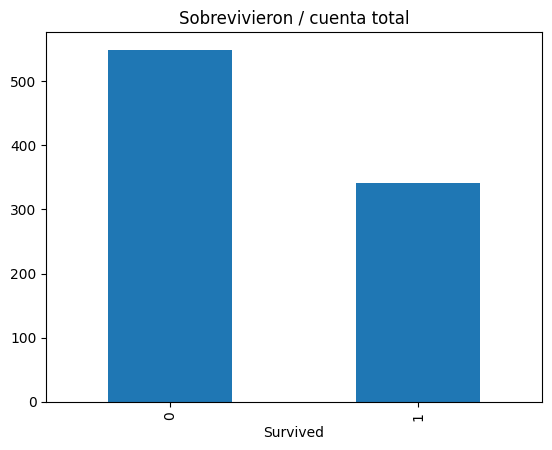

In [16]:
#Grafica de la columna survived
data.Survived.value_counts().plot(kind = 'bar')
plt.title('Sobrevivieron / cuenta total')

Text(0.5, 1.0, 'Sobrevivieron / porcentaje total')

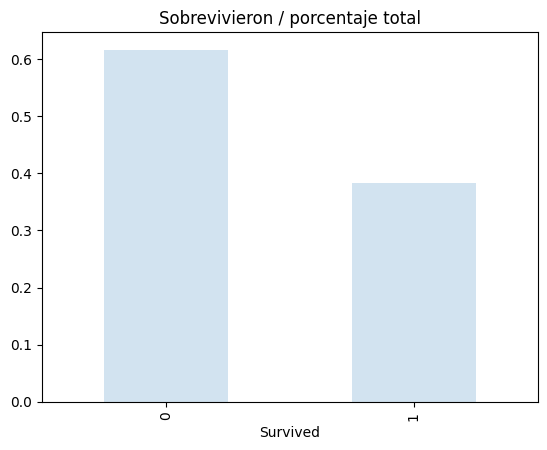

In [17]:
#Grafica de la columna survived por porcentajes
data.Survived.value_counts(normalize = True).plot(kind = 'bar', alpha = 0.2)
plt.title('Sobrevivieron / porcentaje total')

Text(0.5, 1.0, 'Sobrevivieron totales - M vs F')

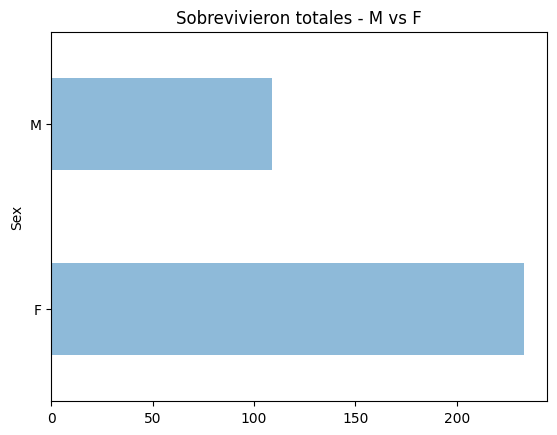

In [19]:
# Grafica de sexo y survived en totales
data.Sex[data.Survived == 1].value_counts().plot(kind = 'barh', alpha=0.5)
plt.title('Sobrevivieron totales - M vs F')

Text(0.5, 1.0, 'Sobrevivieron porcentajes - M vs F')

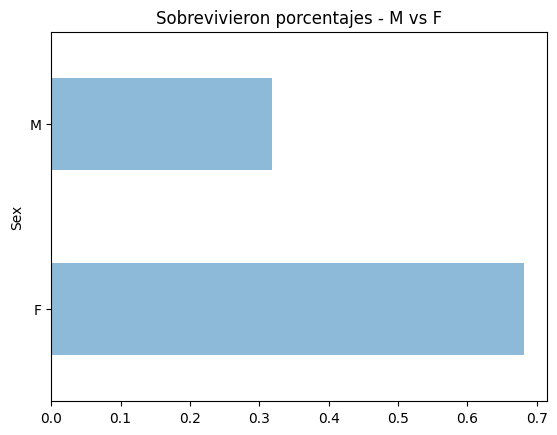

In [20]:
# Grafica de sexo y survived en porcentajes
data.Sex[data.Survived == 1].value_counts(normalize = True).plot(kind = 'barh', alpha=0.5)
plt.title('Sobrevivieron porcentajes - M vs F')

Text(0.5, 1.0, 'Sobrevivientes por clase - Totales')

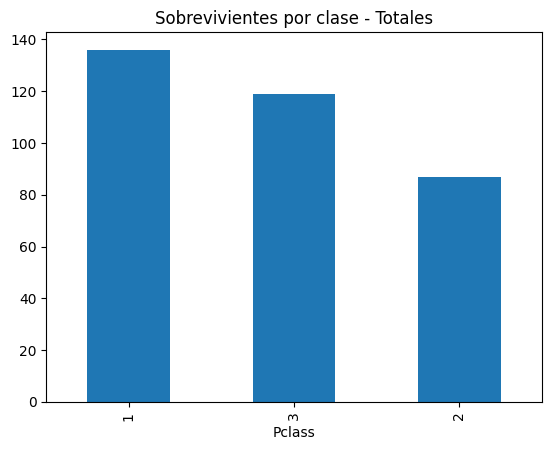

In [21]:
# Grafica por clase de ticket en totales
data.Pclass[data.Survived == 1].value_counts().plot(kind='bar')
plt.title('Sobrevivientes por clase - Totales')

Text(0.5, 1.0, 'Sobrevivientes por clase - Porcentajes')

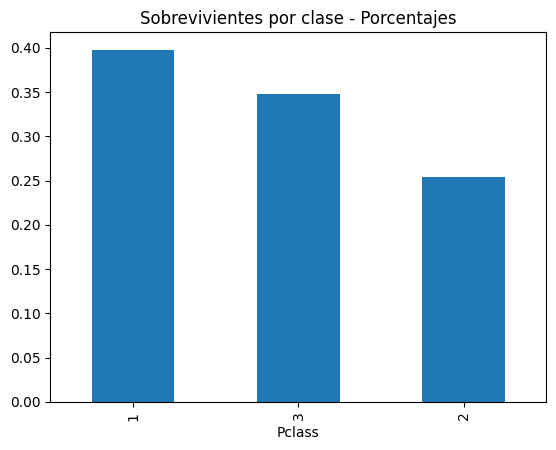

In [22]:
# Grafica por clase de ticket en porcentajes
data.Pclass[data.Survived == 1].value_counts(normalize = True).plot(kind='bar')
plt.title('Sobrevivientes por clase - Porcentajes')

Text(0.5, 1.0, 'Sobrevivientes por clase - Porcentajes')

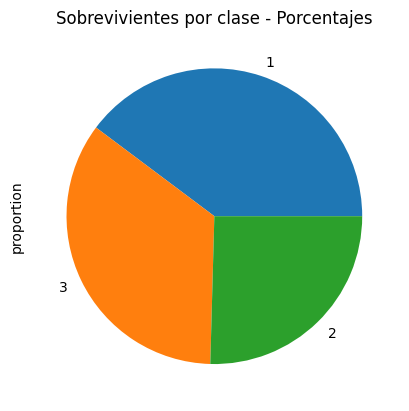

In [23]:
# Grafica por clase de ticket en porcentajes - pastel
data.Pclass[data.Survived == 1].value_counts(normalize = True).plot(kind='pie')
plt.title('Sobrevivientes por clase - Porcentajes')

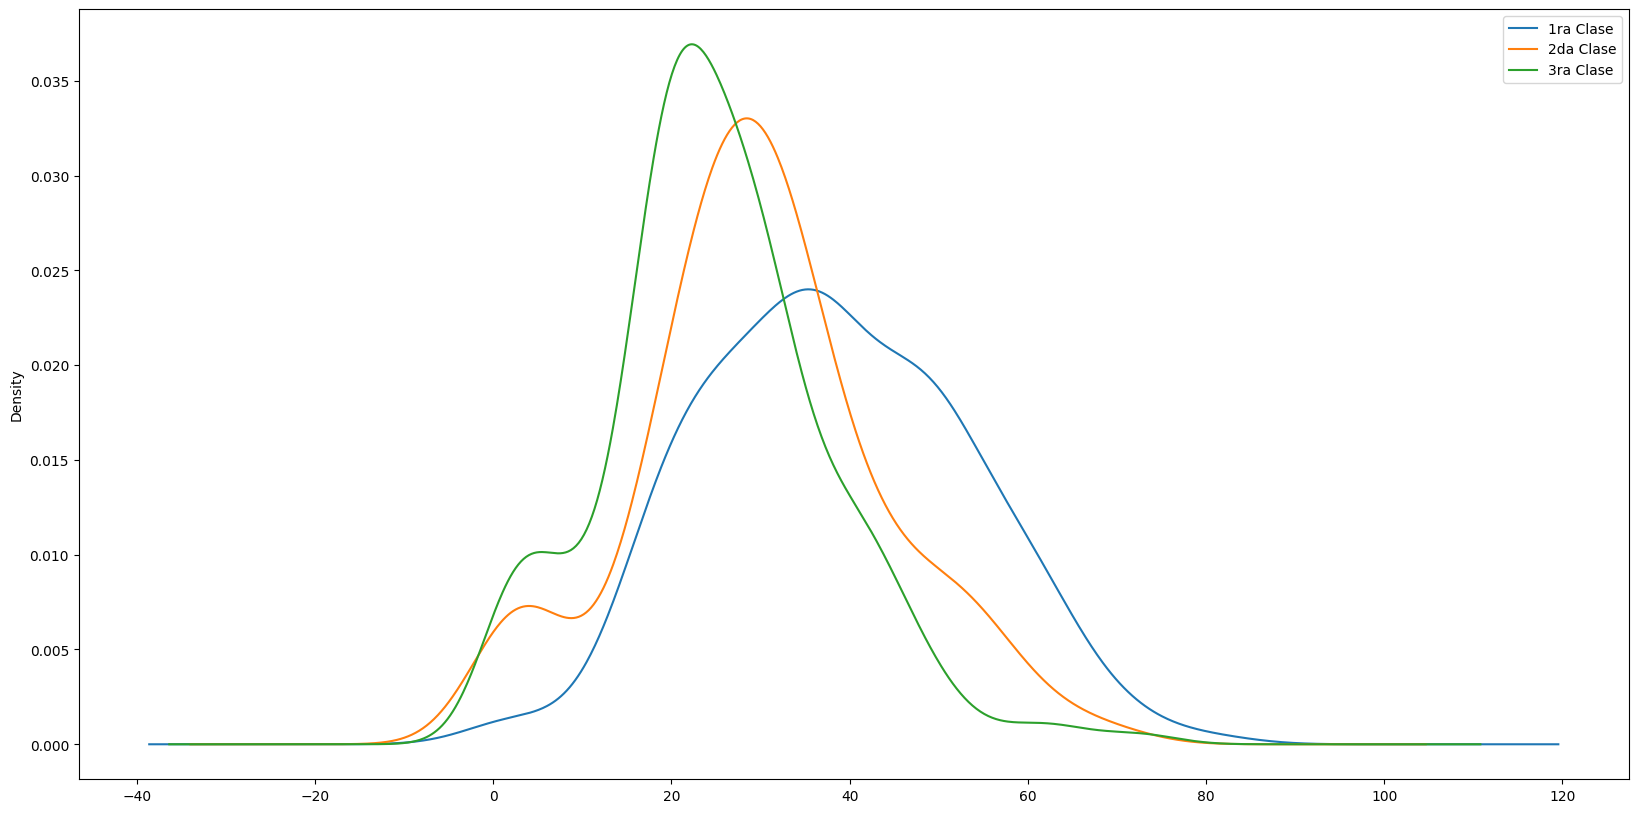

In [26]:
# Revisar si hay una relación entre tipo de ticket y edad
fig = plt.figure(figsize=(20,10)) 
for clase in [1,2,3]:
    data.Age[data.Pclass == clase].plot(kind="kde")
plt.legend(("1ra Clase","2da Clase","3ra Clase"))

In [ ]:
# Cuantas personas eran menores de 1 anio
data[data.Age < 1]